## Observations and Insights 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = pd.merge(study_results,mouse_metadata, on='Mouse ID', how = 'outer')

# Display the data table for preview
dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [95]:
# Checking the number of mice. Grouping by Mouse ID and Timepoint to count doubles(>2)
dataset_gp = dataset.groupby(['Mouse ID','Timepoint'])['Sex'].count()
mouseID = pd.DataFrame(dataset_gp)
mouseID = mouseID.rename(columns = {'Sex':'Mouse Count'})

In [96]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouseID.loc[(mouseID['Mouse Count'] > 1), : ]
duplicate_mice = duplicate_mice.reset_index()   #  pandas.core.frame.DataFrame
delete_mice = duplicate_mice['Mouse ID'].unique()   # numpy.ndarray
print(delete_mice)

['g989']


In [97]:
# Optional: Get all the data for the duplicate mouse ID. 
delete_mice_all = dataset.loc[(dataset['Mouse ID'] == 'g989'), :]

In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = dataset.set_index('Mouse ID')
clean_data = clean_data.drop(index = 'g989')
clean_data = clean_data.reset_index()


In [99]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#function in pandas
summary_gp = clean_data.groupby('Drug Regimen')
summary_st = summary_gp['Tumor Volume (mm3)'].mean()
summary_st = pd.DataFrame(summary_st)
summary_st = summary_st.rename(columns={'Tumor Volume (mm3)':'Mean'})
summary_st['Median'] = summary_gp['Tumor Volume (mm3)'].median()
summary_st['Standard Deviation'] = summary_gp['Tumor Volume (mm3)'].std()

summary_st['Variance'] = summary_gp['Tumor Volume (mm3)'].var()
summary_st['SEM'] = summary_gp['Tumor Volume (mm3)'].sem()
treatments = clean_data['Drug Regimen'].unique()

summary_st

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_gp = clean_data[['Drug Regimen','Tumor Volume (mm3)']]
summary_gp = summary_gp.groupby('Drug Regimen')
# s.describe()[['count','mean']]
#df.describe().loc[['count','max']]
#https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe


summary2 = summary_gp.describe()
summary2.reset_index(level='Drug Regimen', inplace = True)
summary2 = summary2.rename(columns={"50%":"median"})   # pandas.core.frame.DataFrame
#summary2["Variance"] = summary2["std"]**2
summary2.drop(['max', 'count', 'min','25%','75%'], axis=1, level=1, inplace = True)                      
#summary2 = summary2.pop('count')
# del summary2["count"]
#summary_st['Variance'] = summary_st[('std')] **2
summary2.keys()   #columns
#df.describe().unstack()[['count','max']]
#summary3 = summary2.describe().unstack()[['count','max']]
#data_file_df.    # 3.1


MultiIndex([(      'Drug Regimen',       ''),
            ('Tumor Volume (mm3)',   'mean'),
            ('Tumor Volume (mm3)',    'std'),
            ('Tumor Volume (mm3)', 'median')],
           )

## Bar and Pie Charts

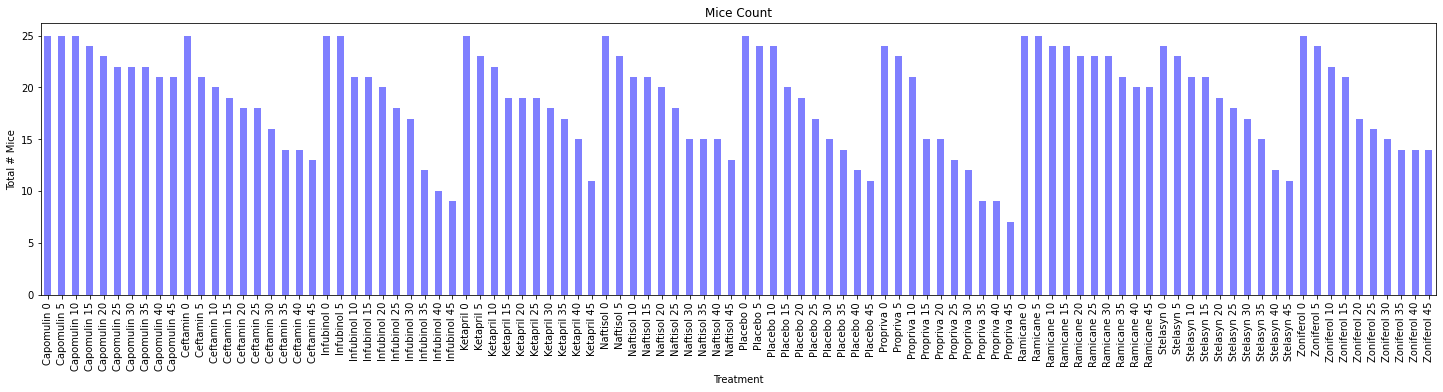

In [102]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
# Using Pandas to Chart a DataFrame

# Organize the data: Groupe the data by drug and timepoint to get count of mice at each timepoint
bar_data = clean_data.groupby(['Drug Regimen','Timepoint'])['Sex'].count()  # pandas.core.series.Series
bar_data_df = pd.DataFrame(bar_data)   # pandas.core.frame.DataFrame
bar_data_df = bar_data_df.reset_index('Timepoint')
bar_data_df = bar_data_df.reset_index('Drug Regimen')
bar_data_df = bar_data_df.rename(columns={'Sex': 'Total Number of Mice'})  
bar_data_df['x_axis'] = bar_data_df['Drug Regimen'] + ' ' + bar_data_df['Timepoint'].astype(str)
bar_data_df.set_index('x_axis')  # sets as x axis in pnadas

# Create bar chart using pandas
bar_pandas = bar_data_df[['x_axis', 'Total Number of Mice']]
bar_pandas = bar_pandas.set_index('x_axis')
bar_pandas.plot(kind="bar", figsize=(25,5), color = 'blue', alpha=0.5, legend = False)
plt.xlabel("Treatment")
plt.ylabel('Total # Mice')
plt.title("Mice Count")

#bar_pandas.set_xticklabels(bar_data_df['x_axis'], rotation=45)
plt.show()

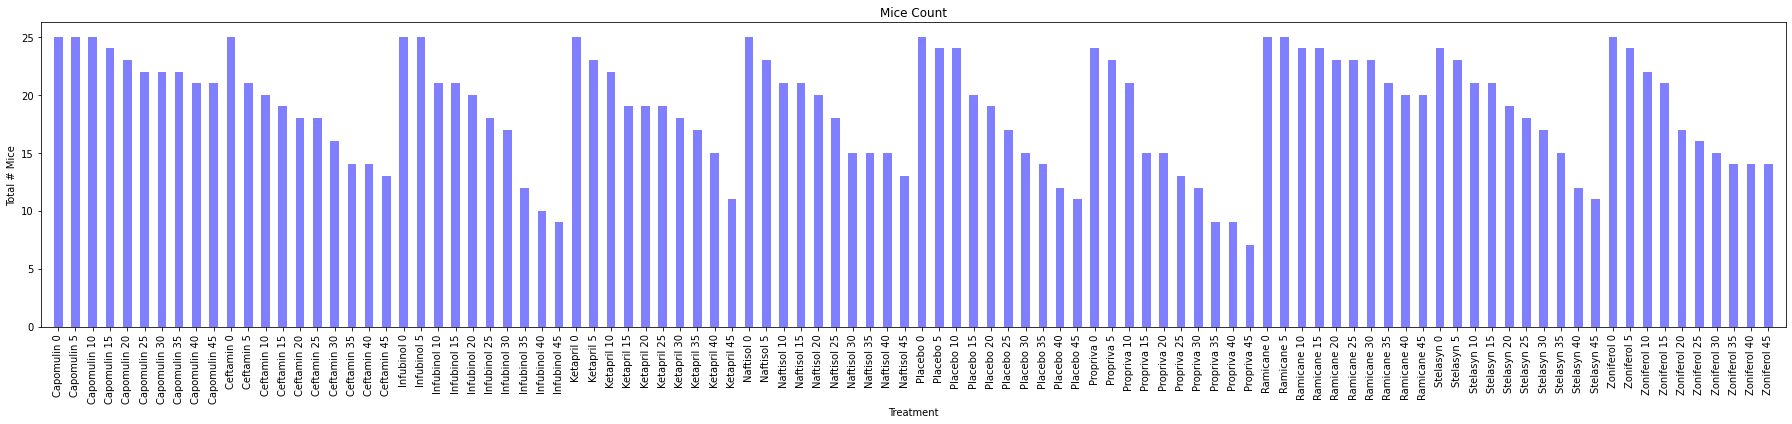

In [103]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# bar_data = clean_data.groupby(['Drug Regimen','Timepoint'])['Sex'].count()

x_axis = bar_data_df['x_axis']
y_axis = bar_data_df['Total Number of Mice']
plt.figure(figsize=(25,6))
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, width = 0.5,align="center")
plt.xlim(-1, len(x_axis))

tick_locations = [x for x in range(len(x_axis))]
plt.xticks(tick_locations,x_axis, rotation="vertical") #, rain_df["State"], 

plt.xlabel("Treatment")
plt.ylabel('Total # Mice')
plt.title("Mice Count")
plt.tight_layout()
plt.show()

pandas.core.series.Series

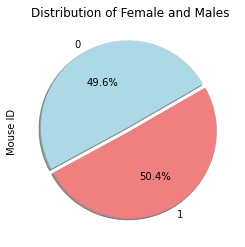

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_data.groupby(['Sex'])['Mouse ID'].nunique()
gender_df = pd.DataFrame(gender_df)
gender_df = gender_df.reset_index()
gender_df = gender_df.rename(columns={'Timepoint': 'Gender Count'})  
gender_count = gender_df["Mouse ID"]
gender_list = gender_df["Sex"]
colors =["lightblue","lightcoral"]
explode = (0.05,0)
gender_count.plot(kind="pie", y=gender_list, colors=colors,autopct="%1.1f%%", shadow=True,
                  startangle=30,explode = explode, title=("Distribution of Female and Males"))
type(gender_list)
#gender_count.set_ylabel("Gender")
#plt.show()

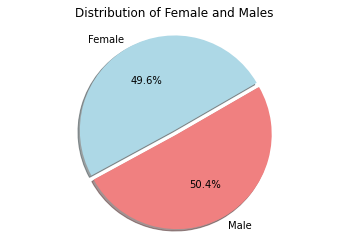

<Figure size 432x288 with 0 Axes>

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors =["lightblue","lightcoral"]
explode = (0.05,0)
plt.pie(gender_count, labels=gender_list, colors=colors, 
        autopct="%1.1f%%", explode= explode, shadow=True, startangle=30)   #alpha =0.5
plt.title("Distribution of Female and Males")
plt.axis('equal')
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_data = clean_data.set_index('Drug Regimen')
tumor_data = tumor_data.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"] , ['Timepoint','Mouse ID',]]

# Start by getting the last (greatest) timepoint for each mouse using max
tumor_data_gp = tumor_data.groupby(['Drug Regimen','Mouse ID'])
tumor_data_max = tumor_data_gp.max()
tumor_data_max.head(100)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint'Tumor Volume (mm3)'
tumor_data_max = tumor_data_max.reset_index()
tumor_data_max = pd.merge(tumor_data_max,clean_data,on=['Mouse ID','Timepoint','Drug Regimen'], how='left')   
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
tumor_data_max

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,Male,1,17
96,Ramicane,u196,45,40.667713,3,Male,18,25
97,Ramicane,w678,5,43.166373,0,Female,5,24
98,Ramicane,y449,15,44.183451,0,Male,19,24


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_vol = tumor_data_max[['Drug Regimen','Tumor Volume (mm3)']]
treatments = tumor_vol['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_stats = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumors_treat = tumor_vol.loc[tumor_vol['Drug Regimen']== treatment, 'Tumor Volume (mm3)']  #pandas.core.series.Series
    # add subset 
    # df = pd.DataFrame[{treatment:tumors_treat.quantile([.25,.5,.75])}]
    quartiles = tumors_treat.quantile([.25,.5,.75])
    print(tumors_treat)
    box_df =pd.DataFrame
    lowerq = quartiles[0.25]
    median = quartiles[0.50]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_stats = tumor_stats.append({"Drug Regimen":treatment, "Lower Quartile":lowerq,"median":median,})
       
#     outlier_treatment = tumors_treat.loc[(tumors_treat['Tumor Volume (mm3)'] < lower_bound) | (tumors_treat['Tumor Volume (mm3)'] > upper_bound)]
#     outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
#     print(f" Potential outliers for {treatment} are {outlier_treatment}")
    # tumor_stats = tumor_stats.add()
#     
#  type(tumors_treat)
    
    
    
    

    

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64
25    62.999356
26    45.000000
27    56.057749
28    55.742829
29    48.722078
30    47.784682
31    61.849023
32    68.923185
33    67.748662
34    57.918381
35    46.784535
36    59.851956
37    64.299830
38    59.741901
39    61.433892
40    64.192341
41    45.000000
42    52.925348
43    45.000000
44    67.527482
45    45.000000
46    64.634949
47    61.386660
48    68.594745
49    64.729837
Name: Tumor Volume (mm3), dtype: float64


AttributeError: 'NoneType' object has no attribute 'append'

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin: Weight vs Tumor Size')

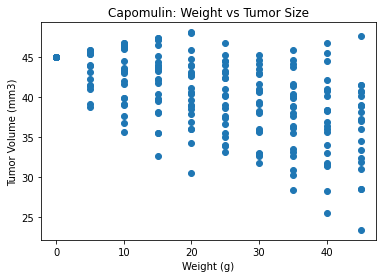

In [109]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_timepoint_x = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),['Timepoint'] ]
capomulin_tumorvol_y = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),['Tumor Volume (mm3)'] ]

plt.scatter(capomulin_timepoint_x,capomulin_tumorvol_y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin: Weight vs Tumor Size")  


Text(0.5, 1.0, 'Capomulin: Weight vs Tumor Size')

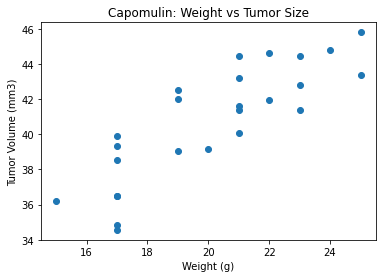

In [110]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),['Mouse ID','Tumor Volume (mm3)','Weight (g)'] ]
capomulin = capomulin.groupby('Mouse ID')
capomulin_avg_Tumor_y = capomulin['Tumor Volume (mm3)'].mean()   # pandas.core.series.Series
# taking avg of wt which is itself   ????????????
capomulin_wt_x= capomulin['Weight (g)'].mean()   # pandas.core.series.Series
#capomulin_timepoint_x = capomulin.groupby('Mouse ID')
# capomulin_timepoint_x = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),['Weight (g)'] ]
# capomulin_tumorvol_y = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),['Tumor Volume (mm3)'] ]

plt.scatter(capomulin_wt_x,capomulin_avg_Tumor_y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin: Weight vs Tumor Size")

## Correlation and Regression

In [162]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_wt_x,capomulin_avg_Tumor_y)
print(f"The correleation coefficient is {round(rvalue,3)}.")
print(f"The linear regression line is y = {round(slope,2)}x + {round(intercept,2)}")

The correleation coefficient is 0.842.
The linear regression line is y = 0.95x + 21.55
